In [1]:
import MetaTrader5 as mt5
import pandas as pd
import time
from datetime import datetime, timedelta
import ta
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')


Making a master dataframe which contains the OHLCV prices for currency pairs

In [2]:

mt5.initialize()

symbols = ['XAUUSD', 'EURUSD', 'GBPUSD', 'AUDUSD', 'GBPJPY', 'USDJPY', 'NZDUSD',  'USDCAD', 'AUDNZD' , 'EURGBP', 'SP500USD', 'BTCUSD' ]
timeframe = mt5.TIMEFRAME_H1
start_date = datetime(2023, 1, 1)
end_time = datetime.now()
    
def get_data(symbol, timeframe, start_date, end_time):
    rates = mt5.copy_rates_range(symbol, timeframe, start_date, end_time)
    df = pd.DataFrame(rates)
    df = df[['time','close']]
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)
    return df

def multiple_pairs_data(symbols):
    symbols_data = {}
    for symbol in symbols:
        symbols_data[symbol] = get_data(symbol, timeframe, start_date, end_time)
    # Concatenate data for each symbol into a single DataFrame
    symbols_data_concatenated = pd.concat(symbols_data, axis=1)
    return symbols_data_concatenated


symbols_data_concatenated = multiple_pairs_data(symbols)

symbols_data_concatenated


,XAUUSD,EURUSD,GBPUSD,AUDUSD,GBPJPY,USDJPY,NZDUSD,USDCAD,AUDNZD,EURGBP,SP500USD,BTCUSD
,close,close,close,close,close,close,close,close,close,close,close,close
time,,,,,,,,,,,,
2023-01-02 08:00:00,NaN,1.06967,1.20747,0.68064,158.124,130.932,0.63310,1.35452,1.07533,0.88509,NaN,NaN
2023-01-02 09:00:00,NaN,1.06935,1.20747,0.68046,158.193,130.967,0.63320,1.35496,1.07458,0.88474,NaN,16664.000
2023-01-02 10:00:00,NaN,1.06791,1.20628,0.67987,157.994,130.951,0.63230,1.35474,1.07548,0.88500,NaN,16677.000
2023-01-02 11:00:00,NaN,1.06788,1.20454,0.68014,157.726,130.940,0.63270,1.35486,1.07515,0.88647,NaN,16660.900
2023-01-02 12:00:00,NaN,1.06784,1.20458,0.67947,157.646,130.876,0.63250,1.35598,1.07415,0.88651,NaN,16670.300
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-22 06:00:00,NaN,1.08557,1.27125,0.66669,198.711,156.309,0.61247,1.36410,1.08845,0.85393,5328.87,70000.738
2024-05-22 07:00:00,NaN,1.08534,1.27096,0.66677,198.714,156.352,0.61174,1.36435,1.08987,0.85393,5328.37,69646.438


Plotting a correlation graph for the close prices of the currency pairs

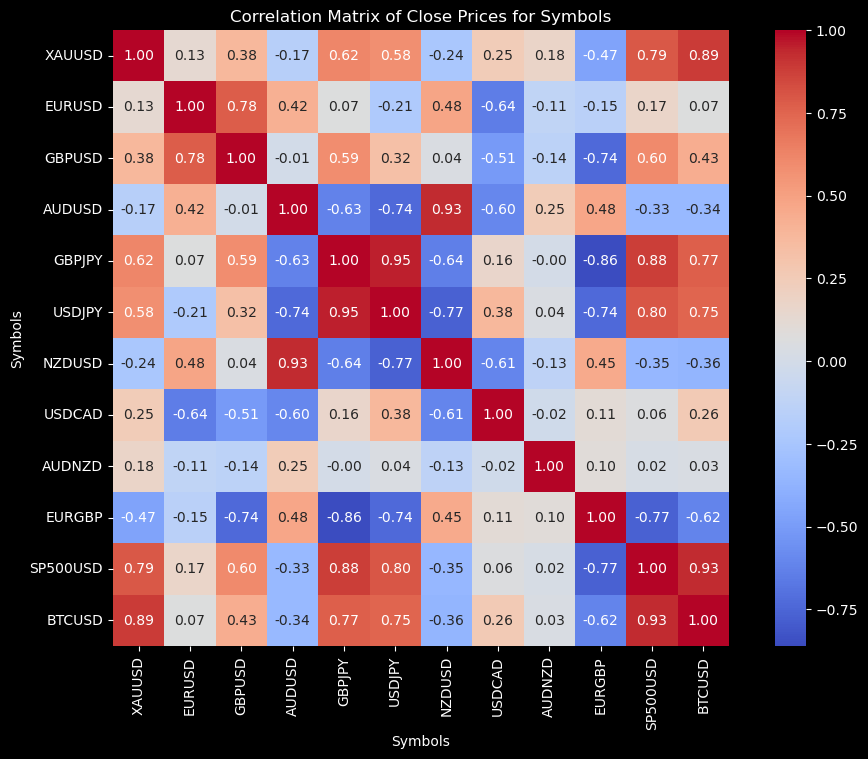

In [3]:
# Extract close prices for each symbol
close_prices = symbols_data_concatenated.xs('close', axis=1, level=1)

# Calculate correlation matrix
correlation_matrix = close_prices.corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Close Prices for Symbols')
plt.xlabel('Symbols')
plt.ylabel('Symbols')
plt.show()

Plotting currency pairs so see price movement correlation


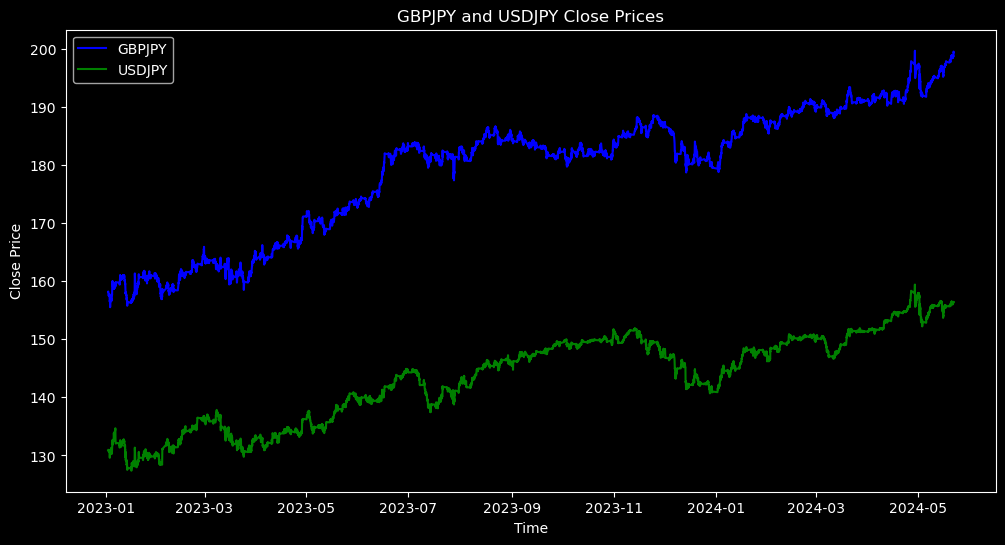

In [4]:
# Extract close prices for GBPJPY and USDJPY
symbol1 = symbols_data_concatenated['GBPJPY']['close'].dropna()
symbol2 = symbols_data_concatenated['USDJPY']['close'].dropna()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(symbol1.index, symbol1.values, label='GBPJPY', color='blue')
plt.plot(symbol2.index, symbol2.values, label='USDJPY', color='green')
plt.title('GBPJPY and USDJPY Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(False)
plt.show()

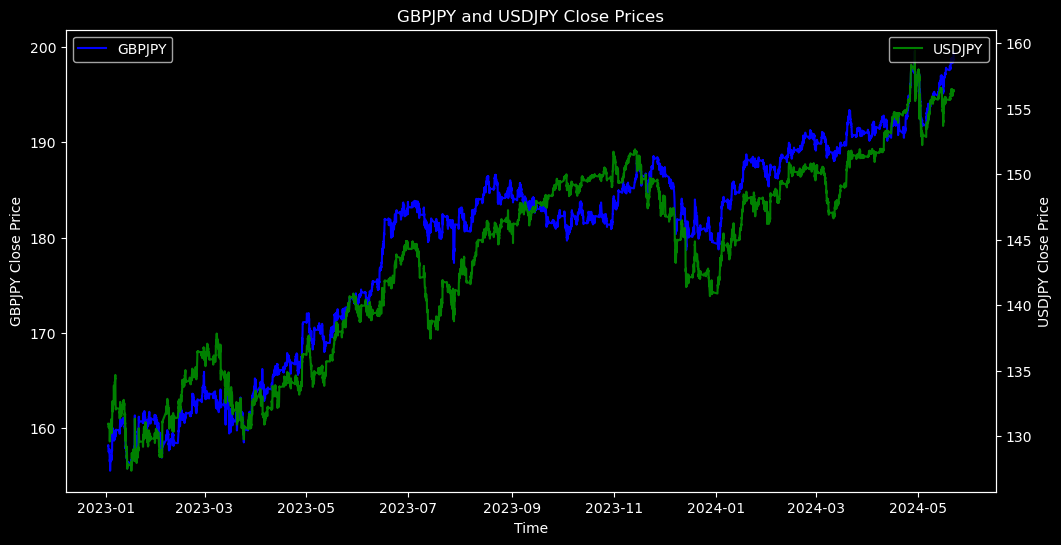

In [5]:

# Example data (replace this with your actual data)
symbol1 = symbols_data_concatenated['GBPJPY']['close'].dropna()
symbol2 = symbols_data_concatenated['USDJPY']['close'].dropna()

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot GBPJPY on the first axis
ax1.plot(symbol1.index, symbol1.values, label='GBPJPY', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('GBPJPY Close Price')
ax1.tick_params('y')

# Create a twin Axes sharing the same x-axis
ax2 = ax1.twinx()

# Plot USDJPY on the second axis
ax2.plot(symbol2.index, symbol2.values, label='USDJPY', color='green')
ax2.set_ylabel('USDJPY Close Price')
ax2.tick_params('y')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('GBPJPY and USDJPY Close Prices')
plt.grid(False)
plt.show()


Constructing a chart for the difference between the pairs

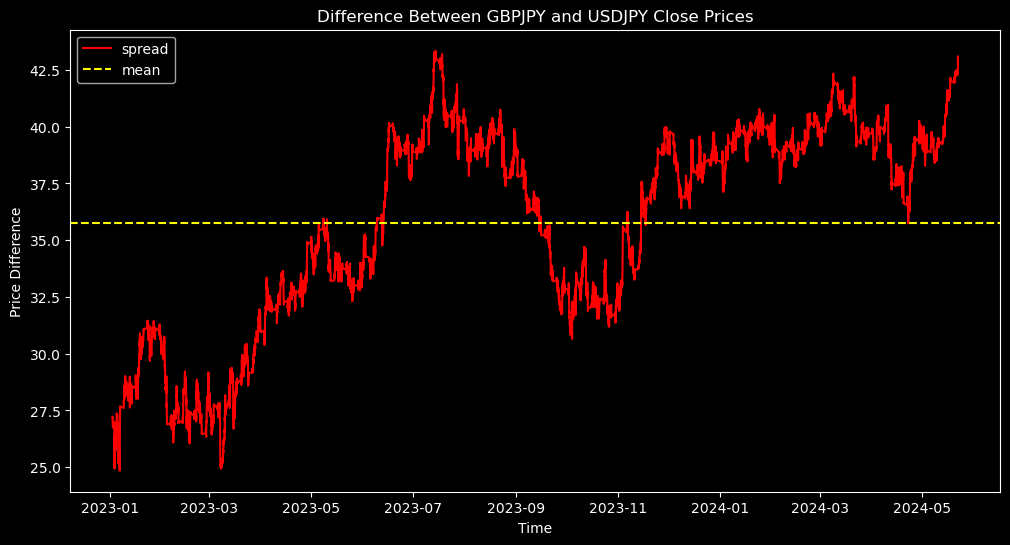

In [6]:
# Calculate the difference between USDJPY and GBPJPY close prices
price_diff = symbol1 - symbol2

price_diff = price_diff.dropna()

# Plotting the difference
plt.figure(figsize=(12, 6))
plt.plot(price_diff.index, price_diff.values, label='Difference (GBPJPY - USDJPY)', color='red')
plt.axhline(price_diff.mean(), color = 'yellow', linestyle = '--')
plt.title('Difference Between GBPJPY and USDJPY Close Prices')
plt.xlabel('Time')
plt.ylabel('Price Difference')
plt.legend(['spread', 'mean'])
plt.grid(False)
plt.show()

In [7]:
# Calculate mean and standard deviation
mu = price_diff.mean()
sigma = price_diff.std()

# Calculate Z-score for each data point
z_scores = (price_diff - mu) / sigma


In [8]:
z_scores

time
2023-01-02 08:00:00   -1.933389
2023-01-02 09:00:00   -1.925729
2023-01-02 10:00:00   -1.966956
2023-01-02 11:00:00   -2.024854
2023-01-02 12:00:00   -2.028459
                         ...   
2024-05-22 06:00:00    1.493185
2024-05-22 07:00:00    1.484174
2024-05-22 08:00:00    1.478767
2024-05-22 09:00:00    1.651785
2024-05-22 10:00:00    1.620245
Name: close, Length: 8640, dtype: float64

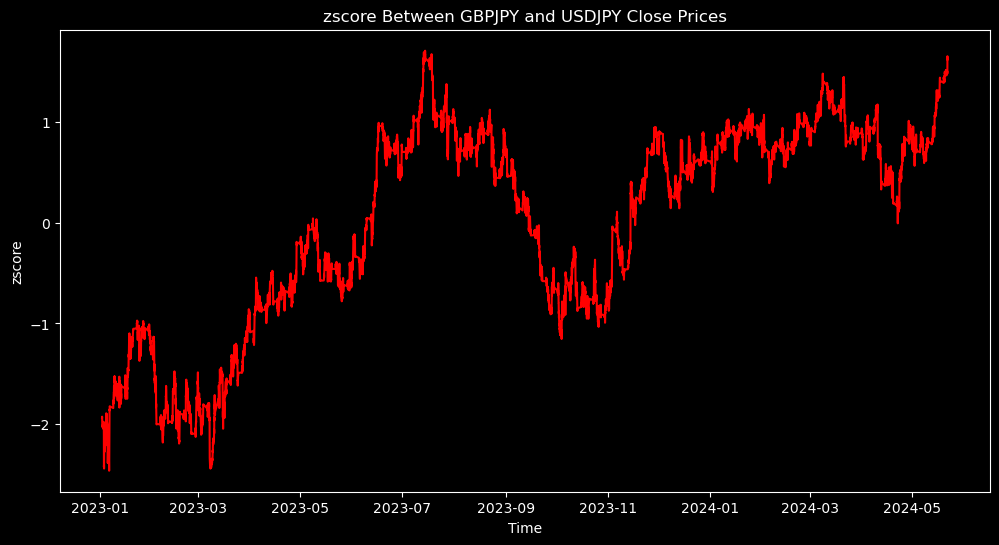

In [9]:
# Plotting the difference
plt.figure(figsize=(12, 6))
plt.plot(z_scores.index, z_scores.values, label='z score (GBPJPY - USDJPY)', color='red')
plt.title('zscore Between GBPJPY and USDJPY Close Prices')
plt.xlabel('Time')
plt.ylabel('zscore')
plt.grid(False)
plt.show()

Cointegration

In [10]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(price_diff.dropna())

# Extracting test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the results
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print('Reject the null hypothesis. The series is stationary.')
else:
    print('Fail to reject the null hypothesis. The series is not stationary.')

ADF Statistic: -1.8772221803917715
p-value: 0.34285120376988676
Fail to reject the null hypothesis. The series is not stationary.
